In [1]:
import argparse
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

## Architecture ::
input 

reshape_for_input_to_cnn 

conv1 

Relu

pool1 

conv2 

Relu

pool2 

flatten

fc1 

Relu

dropout

fc2

softmax
    


In [2]:
def see_sample_input(data_set):
    data = data_set.reshape(-1,28,28,1)
    index = random.randint(0, len(data))
    image = data[index].squeeze()
    
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap="gray")

In [3]:

def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.
  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    
    print "conv1 input shape ",x_image.shape ,\
    " weight shape ",W_conv1.shape, \
    " Bias shape ",b_conv1.shape,\
    " Output shape ",h_conv1.shape

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)
    print "pool1 out shape ",h_pool1.shape

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    print "conv2 input shape ",h_pool1.shape ,\
    " weight shape ",W_conv2.shape, \
    " Bias shape ",b_conv2.shape,\
    " Output shape ",h_conv2.shape

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)
    print "pool2 out shape ",h_pool2.shape

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    print "fc1 input shape ",h_pool2.shape ,\
    " weight shape ",W_fc1.shape, \
    " Bias shape ",b_fc1.shape,\
    " Output shape ",h_fc1.shape

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    print "fc2 input shape ",h_fc1_drop.shape ,\
    " weight shape ",W_fc2.shape, \
    " Bias shape ",b_fc2.shape,\
    " Output shape ",y_conv.shape
    
  return y_conv, keep_prob




In [4]:
def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)




## Visualise data

In [5]:
data_dir = '/tmp/tensorflow/mnist/input_data'
graph_location = "/home/abhay/Documents/LearnersHeaven/personalstuffs/getting_to_know_tensors/graphs"
num_epochs = 500

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


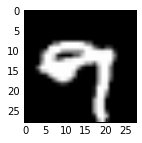

In [6]:
mnist = input_data.read_data_sets(data_dir, one_hot=True)
see_sample_input(mnist.train.images)

In [ ]:
def main(_):
  # Import data
  mnist = input_data.read_data_sets(data_dir, one_hot=True)
  #see_sample_input(mnist.train.images)
  # Create the model
  
  x = tf.placeholder(tf.float32, [None, 784])

  # Define loss and optimizer
  y_ = tf.placeholder(tf.float32, [None, 10])

  # Build the graph for the deep net
  y_conv, keep_prob = deepnn(x)

  with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                            logits=y_conv)
  cross_entropy = tf.reduce_mean(cross_entropy)

  with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

  with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)

  
  print('Saving graph to: %s' % graph_location)
  train_writer = tf.summary.FileWriter(graph_location)
  train_writer.add_graph(tf.get_default_graph())
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(200):
      batch = mnist.train.next_batch(50)
      if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
      train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
    prediction_one_hot = y_conv.eval(feed_dict={
        x: mnist.test.images[1].reshape(1,784), keep_prob: 1.0})
    outcome = np.argmax(prediction_one_hot, 1)
    print('output for test image is ',outcome[0])
    #see_sample_input(mnist.test.images[1])



In [ ]:

main(_)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
conv1 input shape  (?, 28, 28, 1)  weight shape  (5, 5, 1, 32)  Bias shape  (32,)  Output shape  (?, 28, 28, 32)
pool1 out shape  (?, 14, 14, 32)
conv2 input shape  (?, 14, 14, 32)  weight shape  (5, 5, 32, 64)  Bias shape  (64,)  Output shape  (?, 14, 14, 64)
pool2 out shape  (?, 7, 7, 64)
fc1 input shape  (?, 7, 7, 64)  weight shape  (3136, 1024)  Bias shape  (1024,)  Output shape  (?, 1024)
fc2 input shape  (?, 1024)  weight shape  (1024, 10)  Bias shape  (10,)  Output shape  (?, 10)
Saving graph to: /home/abhay/Documents/LearnersHeaven/personalstuffs/getting_to_know_tensors/graphs
step 0, training accuracy 0.02
step 100, training accuracy 0.76


## Assignment :
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

Submit the notebook with the result.

![alt text](lenet-5-arch.png "Lenet-5")

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.